<a href="https://colab.research.google.com/github/mewakinHub/DeepNeuralNetwork-Y3T1/blob/main/css324f23_hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSS324 Homework Assignment 2

CIFAR10 is a small image classification dataset. Its objective is to classification an 32x32 color image into 10 classes.

See https://www.cs.toronto.edu/~kriz/cifar.html and https://keras.io/api/datasets/cifar10/ for more details.

## Group Members
1. Teetawat Bussabarati 6422782423
2. Napat Ariyapattanaporn 6422782399


In [2]:
# Load necessary libraries
import tensorflow as tf # creating and training neural networks
import matplotlib.pyplot as plt # for plotting
import numpy as np #  for numerical operations

In [4]:
# Load CIFAR10 dataset using TensorFlow's Keras API
(x, y), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
y, y_test = y.flatten(), y_test.flatten()
x = x / 255
x_test = x_test / 255
# The dataset is then normalized by dividing the pixel values by 255 to scale them between 0 and 1.

Each pixel in the images of the CIFAR-10 dataset originally has a value between 0 and 255, where 0 represents black and 255 represents white (for grayscale images). By dividing each pixel value by 255, the pixel values are scaled to the range [0, 1].

The CIFAR-10 dataset
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

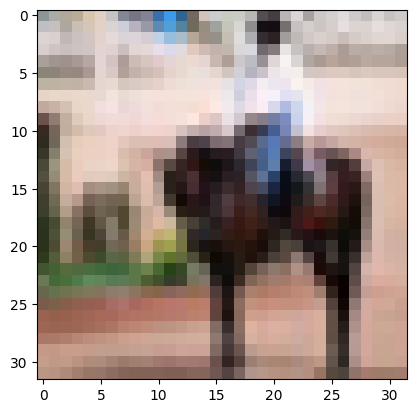

Class= 7


In [5]:
# Plot a training example
plt.imshow(x[11, :, :, :])
plt.show()
print(f"Class= {y[11]}")        # 7 = horse

The colon : is a slice operator that means "all elements along this axis."
The notation x[11, :, :, :] is used to select the 12th image in a 4D NumPy array.

Axis 0: Index of the image in the dataset (in this case, 11 for the 12th image).
Axis 1: Width of the image.
Axis 2: Height of the image.
Axis 3: Channels or color information in the image (for RGB images, it would be 3 for red, green, and blue channels).

x[11] gives you the pixel values of the 12th image in the dataset, and y[11] gives you the class label associated with that image. The combination of an image (x[11]) and its corresponding label (y[11]) is a common structure in supervised machine learning datasets where you have input-output pairs for training a model.

In [6]:
# Split the training set
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=11)
X_test = x_test

print("Shape of the datasets")
print("Training set   =", X_train.shape, y_train.shape)
print("Validation set =", X_valid.shape, y_valid.shape)
print("Test set       =", X_test.shape, y_test.shape)

Shape of the datasets
Training set   = (40000, 32, 32, 3) (40000,)
Validation set = (10000, 32, 32, 3) (10000,)
Test set       = (10000, 32, 32, 3) (10000,)


In [7]:
# Use one-hot encoding for y
Y_train = tf.one_hot(y_train, 10)
Y_valid = tf.one_hot(y_valid, 10)
Y_test = tf.one_hot(y_test, 10)

## Task

Construct a deep neural network to classify images in the CIFAR10 dataset. You can choose the numbers of hidden nodes, appropriate activation functions, regularizers, or the structure of the network.

After the training process, print the training, validation, and test accuracies, as well as plot the training loss and validation loss.

**Contraints**
 - The number of weight layers must be less than or equal to 6.
 - The number of training epochs must be set to 50.
 - Your model must achieve the test accuracy of at least 60%.

**Rules**
 - This is a group work. Each group can compose of up to three members.

In [8]:
# Your implementation for Question 1
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten

model = Sequential([
    Input(shape=(32, 32, 3)),
    Flatten(),
    Dense(500, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

model.compile(optimizer=tf.keras.optimizers.Adam(3e-4), loss='categorical_crossentropy', metrics=['accuracy'])

hist1 = model.fit(X_train, Y_train, batch_size=4096, validation_data=(X_valid, Y_valid), epochs=50)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 500)               1536500   
                                                                 
 dense_1 (Dense)             (None, 10)                5010      
                                                                 
Total params: 1541510 (5.88 MB)
Trainable params: 1541510 (5.88 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
10/10 [==============================] - 6s 110ms/step - loss: 2.3756 - accuracy: 0.1533 - val_loss: 2.1135 - val_accuracy: 0.2089
Epoch 2/50
10/10 [==============================] - 0s 48ms/step - loss: 2.0525 - accuracy: 0.2552 - val_loss: 1.9930 - val_accuracy: 0.2781

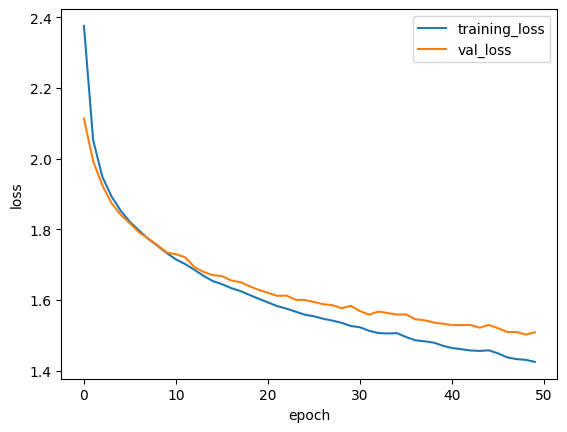

In [9]:
# Plot the training loss and validation loss
N = len(hist1.history['loss'])
plt.plot(np.arange(N), hist1.history['loss'])
plt.plot(np.arange(N), hist1.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training_loss', 'val_loss'], loc='upper right')
plt.show()

In [10]:
res = model.evaluate(X_train, Y_train, verbose=0, batch_size=2048)
print(f"Training accuracy   = {res[1]:.4f}")
res = model.evaluate(X_valid, Y_valid, verbose=0, batch_size=2048)
print(f"Validation accuracy = {res[1]:.4f}")
res = model.evaluate(X_test, Y_test, verbose=0, batch_size=2048)
print(f"Test accuracy       = {res[1]:.4f}")

Training accuracy   = 0.5105
Validation accuracy = 0.4748
Test accuracy       = 0.4730
